Text(0, 0.5, 'Neighborhoods')

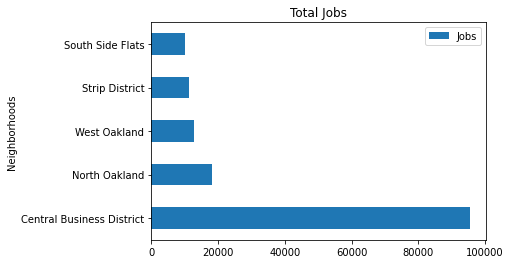

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("Neighborhoods_with_SNAP_Data.csv", index_col = "Neighborhood_2010_HOOD",parse_dates=True) #set neighboorhood columns as index

data = data[['Pop__2010','Total___Jobs_Located_in_N_hood_','SNAP_All_csv_Jobs_in__Hood__Con','SNAP_All_csv_Commute_to_Work__D']] # select only population, total jobs, and job % columns, get rid of other columns
data.dropna()
jobdata = data.drop(columns = ['Pop__2010', 'SNAP_All_csv_Jobs_in__Hood__Con','SNAP_All_csv_Commute_to_Work__D']) #drop unwanted columns in list
jobdata = jobdata.sort_values(by = 'Total___Jobs_Located_in_N_hood_', ascending = False) #sort descending

jobdata.columns = {'Jobs'} #rename columns
 #central business district huge outlier at 90000
jobdata.head().plot(kind = 'barh', title = "Total Jobs")
plt.ylabel('Neighborhoods')

We should get rid of the cerntral business district outlier, as there won't be much housing there and it will be very pricey.

Text(0, 0.5, 'Neighborhoods')

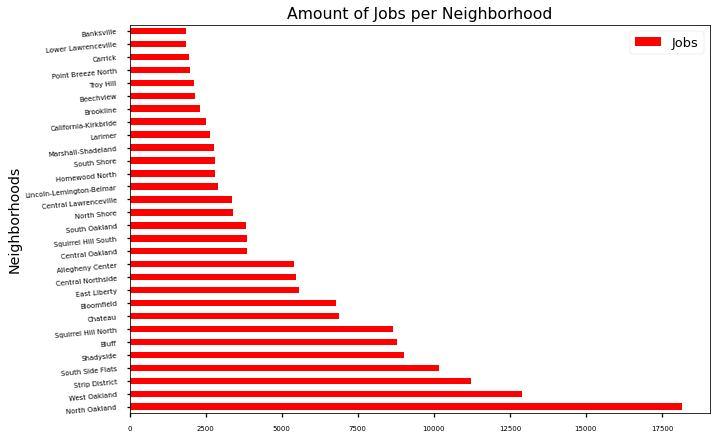

In [32]:
jobdata = data.drop(columns = ['Pop__2010', 'SNAP_All_csv_Jobs_in__Hood__Con','SNAP_All_csv_Commute_to_Work__D'])
jobdata = jobdata[jobdata['Total___Jobs_Located_in_N_hood_'] < 80000] # plot everything but business districtcol
jobdata = jobdata.sort_values(by = 'Total___Jobs_Located_in_N_hood_', ascending = False) #sort descending
jobdata.columns = {'Jobs'}
jobdata.head(30).plot(kind = 'barh', title = "Amount of Jobs per Neighborhood",rot=5,fontsize=7, color = 'red') #index is on y axis now
plt.ylabel('Neighborhoods')


Know we know where all the jobs are, now lets see if we have to drive to these jobs, as in 2018 studies found that the average commute to work takes up to 27 minutes a person's time one way. [1] This works out to around 225 hours a year dedicated to getting to work. If we can work from home, its attractiveness for housing is much higher

[1] https://www.washingtonpost.com/business/2019/10/07/nine-days-road-average-commute-time-reached-new-record-last-year/

Text(0.5, 0, 'Neighborhoods')

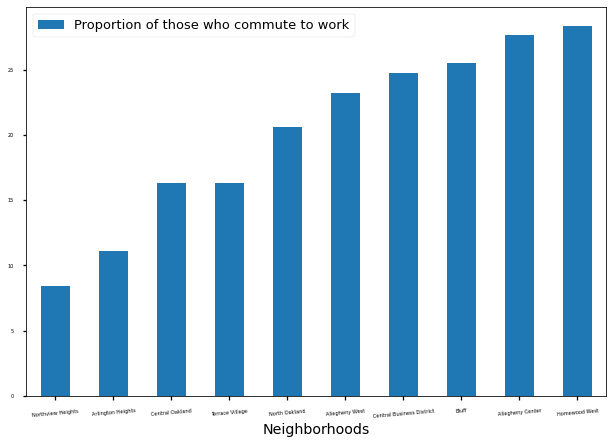

In [51]:
data = pd.read_csv("Neighborhoods_with_SNAP_Data.csv", index_col = "Neighborhood_2010_HOOD",parse_dates=True)#set neighboorhood columns as index

data = data[['Pop__2010','Total___Jobs_Located_in_N_hood_','SNAP_All_csv_Jobs_in__Hood__Con','SNAP_All_csv_Commute_to_Work__D']] # select only population, total jobs, and job % columns
data.dropna()
commute = data.drop(columns = ['Pop__2010','SNAP_All_csv_Jobs_in__Hood__Con','Total___Jobs_Located_in_N_hood_'])

for row in commute:
    try:
        commute['SNAP_All_csv_Commute_to_Work__D'] = commute['SNAP_All_csv_Commute_to_Work__D'].str.rstrip('%').astype('float')
        #strip away the % from string and convert to float 
    except:
        pass
commute = commute.sort_values(by = 'SNAP_All_csv_Commute_to_Work__D', ascending = True) #get the smallest percentages

plt.style.use('seaborn-talk')

commute.columns = {'Proportion of those who commute to work'} #rename columns
commute.head(10).plot(kind = 'bar', rot = 5,fontsize=5)
plt.xlabel('Neighborhoods')


  #https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte